# Dynamisches Programmieren<a name="dynProg"> </a>

*Dynamic Programming* (dynamisches Programmieren) *kann* Effizienzverbesserungen erzielen, indem wiederkehrende Teilprobleme (vorsorglich) gelöst werden. Das Wort _Programming_ steht hier für Optimierung (ähnlich wie bei Linear Programming). *Optimierung* ist zutreffend, da mit Dynamic Progamming Optimierungsprobleme gelöst werden, also Probleme, bei denen ein Minimum bzw. Maximum gefunden werden soll. Die Methode wurde von Richard Bellmann 1940 zur Lösung von Problemen in der Regelungstechnik angewandt.

Wie bei Teile und Herrsche besteht das Ziel darin, ein großes Gesamtproblem in kleinere Subprobleme zu zerlegen und deren Lösungen zu speichern: in einer Hashmap bei Teile und Herrsche und (konzeptionell) in einer Tabelle bei Dynamischem Programmieren. Teile und Herrsche arbeitet top down mit Rekursion und Memoizing. Bei Dynamic Programming geht man *bottom up* vor und berechnet die Lösungen für alle möglichen Subprobleme, auch wenn einige davon zur Lösung des komplexen Ausgangsproblems gar nicht erforderlich sind. (Auf jeden Fall kann dadurch beim Zusammenbau der Gesamtlösung keine Teillösung fehlen!) 

Ein entscheidender Unterschied zu Divide and Conquer ist die Gültigkeit der *Optimalitätsbedingung* (s.u.) bei Dynamic Programming. Da sich Teilprobleme in mehreren größeren Problemen wiederfinden können, kann durch das Speichern der Lösungen ein Effizienzgewinn erzielt werden.

Charakteristik von Dynamic Programming:

 - Ein jeweils größeres Problem wird in Teilprobleme zerlegt.
 - Die optimalen Lösungen der Teilprobleme werden genutzt, um die optimale Lösung eines größeren Problems zu finden.
 - Die Optimalitätsbedingung (Principle of Optimality) muss gelten, d.h. die optimale Lösung des Gesamtproblems muss sich zwangsläufig aus den optimalen Lösungen der Teilprobleme ergeben.
 - *Trade space for time* - es wird zusätzlicher Speicherplatz investiert, um den Algorithmus zu beschleunigen.
 
Das wichtigste Strukturierungsmittel von Dynamic Programming ist eine Tabelle. Die Felder der Tabelle enthalten Werte, die das jeweilige Optimum darstellen. Für deren Berechnung könnte man die mit Teile und Herrsche entwickelte rekursive Verschrift einsetzen. Dynamisches Programmieren sieht jedoch eine zeilenweise Bestimmung der Feldelemente vor. Bis auf ein Feld, das sich in den folgenden Beispielen rechts unten befindet, sind alle Werte Zwischenwerte, auf die die Folgezeilenberechnungen zurückgreifen, ohne sie erneut zu berechnen.

Diese Charakteristik hebt die Überlegenheit des rekursiv definierten Top-Down-Verfahrens (Teile und Herrsche) gegenüber dem Dynamic Programming Bottom-up-Verfahren hervor, denn die Herstellung der Tabellengestalt kann fehlerbehaftet sein, während die rekursive Beziehung bereits die Lösung verkörpert. Außerdem werden durch die rekursive Berechnung nicht alle Tabellenfeldinhalte ermittelt. Um Mehrfachberechnungen auszuschließen wird Memoizing eingesetzt.


## Fibonacci-Zahlen

Ein Beispiel, für welches *Teile und Herrsche* benutzt werden kann, sind die Fibonacci-Zahlen. Es ist sehr einfach, die rekursive Bildungsvorschrift anzugeben:

$$
fib(n) = \begin{cases}
    0, & \text{wenn $n=0$} \\
    1, & \text{wenn $n=1$} \\
    fib(n-1) + fib(n-2), & \text{sonst}
\end{cases}
$$

Dies lässt sich auch schnell programmieren:

In [10]:
def fib_naive(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib_naive(n-1) + fib_naive(n-2)

print(list(map(fib_naive, list(range(0, 15)))))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


### Rekursionsbaum

<img src="img/fib_tree.png" width="900" >

### Rekursive Berechnung mit Memoizing

Analysiert man die Zeitkomplexität des oben beschriebenen Algorithmus, so ergibt sich ein exponentieller Aufwand ($\Theta(\phi^n), \phi>1$), und das für ein Problem, das nicht sehr komplex zu sein scheint. *Memoizing* kann genutzt werden, um die Fibonacci-Zahlen wesentlich schneller zu berechnen. Durch Memoizing fehlen viele Berechnungsäste des Rekursionsbaumes. Er wächst nicht exponentiell, sondern linear.

<img src="img/fib_tree_dp.png" width="300" >

Die Grundidee besteht darin, jeden Wert nur einmal ausrechnen zu müssen. Wurde erstmals eine Fibonacci-Zahl berechnet, so wird sie in einem Zwischenspeicher abgelegt und steht zur Verfügung, sobald sie wieder benötigt wird. Hierfür sollte eine Datenstruktur gewählt werden, mit der man in $\mathcal{O}(1)$ den Wert für einen Key lesen kann. Natürlich bietet sich eine Hashmap an, die den Parameter $n$ auf $fib(n)$ abbildet, oder ein Array, bei dem die $n$-te Fibonacci-Zahl im Index $n$ steht.

In [11]:
dic = {}

def fib(n):
    if n in dic:
        return dic[n]
    if n == 0:
        f = 0
    elif n == 1:
        f = 1
    else:
        f = fib(n-1) + fib(n-2)
    dic[n] = f
    return f

print(list(map(fib, list(range(0, 15)))))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


### Dynamisches Programmieren (Bottom-up)

Klassisches Dynamic Programming ist ein *Bottom-Up Verfahren*, also ein Algorithmus, der bei einem Blatt des Rekursionsbaums beginnt und schrittweise die nächstgrößeren Werte berechnet. Bei den Fibonacci-Zahlen ist der Bottom-Up Ansatz relativ intuitiv: Ausgehend von den bereits gegebenen Werten von $fib(0)=0$ und $fib(1)=1$ berechnet man in einer Schleife von 2 bis $n$ schrittweise den jeweils nächstgrößeren Wert. Da zur Berechnung einer Fibonacci-Zahl, die zwei nächstkleineren Fibonacci-Zahlen benötigt werden, ist sichergestellt, dass die jeweils benötigten Werte vorliegen, denn die Schleife arbeitet "von klein zu groß".

In folgendem nichtrekursiven Programm ist deshalb eine Zählschleife zu sehen. 

In [12]:
def fib_bottom_up(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    n_minus_2 = 0
    n_minus_1 = 1
    for i in range(2, n+1):
        f = n_minus_1 + n_minus_2
        n_minus_2 = n_minus_1
        n_minus_1 = f
    return f

print(list(map(fib_bottom_up, list(range(0, 15)))))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


In beiden Fällen müssen $n$ Fibonacci-Zahlen berechnet werden, deren Zeitaufwände lediglich in $\mathcal{O}(1)$ liegen, da die Werte entweder durch die Verwaltung der Rekursion (Aufstieg aus der Tiefe) oder durch die Ausführung der Schleife bereits vorliegen. Somit ergibt sich insgesamt ein Zeitaufwand in $n \cdot \mathcal{O}(1) = \mathcal{O}(n)$.

## Das 0/1-Rucksack-Problem

Um das 0/1-Rucksack-Problem zu lösen, kann Dynamic Programming ebenfalls benutzt werden. Für eine *Menge* von $n$ Gegenständen, deren individuelles Gewicht und zugehöriger Wert vorgegeben sind, ist eine Auswahlentscheidung zu treffen: Mitnahme im Rucksack mit Kapazität $K$ oder nicht. Das Ziel besteht darin, den Gesamtwert (Summe aller Werte der eingepackten Gegenstände) zu maximieren, ohne mit der Gewichtssumme die Rucksackkapazität $K$ zu überschreiten.

In der folgenden rekursiven Definition des maximalen Gesamtwertes sind $i$ der Index des letzten Gegenstandes in der Gegenstandsliste und $K$ die Kapazität (das maximal zulässige Gewicht, welche der Rucksack tragen kann).

$$value(i,k)=\begin{cases}
    0, & \text{wenn $i=0$}\\
    value(i-1,k), & \text{wenn $i>0 \text{ und } w[i]>k$}\\
    \max(value(i-1,k), value(i-1,k-w[i]) + v[i]), & \text{sonst}
  \end{cases}$$
  
$i=0$ bedeutet, dass kein einziger Gegenstand in den Rucksack gepackt wird. Der Gesamtwert ist damit gleich 0. Wenn ein weiterer Gegenstand verfügbar ist, mit dessen Aufnahme jedoch die Rucksack-*Rest*kapazität überschritten werden würde, ist der erreichbare Wert gleich dem Wert der Rucksackbefüllung ohne diesen Gegenstand, d.h. nur bis einschließlich Gegenstand $i-1$. (Dies bedeutet nicht, dass sich Gegenstand $i-1$ zwangsläufig im optimalen Rucksack befinden muss.) 

Wir interpretieren nun die obige rekursive Formel. Wenn der Gegenstand prinzipiell in den Rucksack passt, d.h. die Restkapazität nicht überschreitet, fragt man nach dem größeren der beiden erzielbaren Gesamtwerte:

1. Nimmt man den Gegenstand $i$ in den Rucksack auf, ergibt sich der Wert aus der Summe des Wertes dieses Gegenstands und dem erreichbaren Maximalwert des kleineren Rucksacks, der die Gegenstandsliste bis $i-1$ berücksichtigt. Die dafür verbleibende Restkapazität wird dann allerdings um das Gewicht des $i$-ten Gegenstands verringert.

2. Nimmt man den Gegenstand $i$ nicht in den Rucksack auf, bleibt es bei dem über die Gegenstände $0$ bis $i-1$ zu ermittelnden max. Gesamtwert, wofür dann allerdings eine unverminderte Restkapazität zur Verfügung steht.

Gesucht ist der Wert $value(n,K)$. In folgendem Programm findet sich am Ende der Aufruf `value(n, K)` bzw. `value_memo(n, K)`.



In [13]:
import functools

K = 120 # maximum capacity

items = [(13, 19), (11, 20), (17, 23), (15, 21), (16, 27), (14, 25), (18, 25), 
         (10, 18), (19, 24), (12, 17)] # list of weight-value pairs of all items

n = len(items) - 1 # index of last item

weights = []
values = []

calls = 0 # global variable to count functional calls

for item in items:
    weights.append(item[0])
    values.append(item[1])


# memoize decorator
def memoize(func):
    func.cache = {}

    @functools.wraps(func)
    def memoized_func(*args, **kwargs):
        key = str(args) + str(kwargs)
        if key not in func.cache:
            func.cache[key] = func(*args, **kwargs)
        return func.cache[key]

    return memoized_func


@memoize
def value_memo(i, k):
    global calls
    calls += 1
    if i < 0:
        return 0
    if weights[i] > k:
        return value_memo(i - 1, k)
    return max(value_memo(i - 1, k), value_memo(i - 1, k - weights[i]) + values[i])


def value(i, k):
    global calls
    calls += 1
    
    if i < 0:
        return 0
    if weights[i] > k:
        return value(i - 1, k)
    return max(value(i - 1, k), value(i - 1, k - weights[i]) + values[i])


print('Mit Memoization:')
print('Ergebnis: ' + str(value_memo(n, K)))
print('Funktionsaufrufe: ' + str(calls))
calls = 0
print()
print('Ohne Memoization:')
print('Ergebnis: ' + str(value(n, K)))
print('Funktionsaufrufe: ' + str(calls))

Mit Memoization:
Ergebnis: 183
Funktionsaufrufe: 502

Ohne Memoization:
Ergebnis: 183
Funktionsaufrufe: 2026


Ohne dynamisches Programmieren handelt es sich um einen Exponentialzeit-Algorithmus. $k$ und $i$ stellen die Problemgröße dar. Um den Wert eines Problems mit der Größe $i$ zu berechnen, muss bis zu zweimal (im sonst-Fall) der Wert eines Problems der Größe $i-1$ berechnet werden. Das heißt die Zeit zur Berechnung der Lösung verdoppelt sich mit jedem Inkrement von $i$, was zu einer exponentiellen Laufzeit führt. 

Durch dynamisches Programmieren kann dies verbessert werden. Anstatt das gleiche Teilproblem immer wieder neu zu berechnen, wird die Lösung in einem Dictionary mit dem Parameter-Paar als Schlüssel gespeichert. Memoizing!  Nun kann in vielen Fällen, der Wert aus dem Dictionary wiederverwendet, d.h. in $\mathcal{O}(1)$ gelesen, werden. Da jeder Wert nur einmal berechnet werden muss, ist die Zeit, um das Gesamtproblem zu lösen, das Produkt aus der Anzahl der Teilprobleme und der Zeit für deren Lösung. 

Die Zahl der Teilprobleme ist durch die Anzahl $nK$ aller möglichen Tupel $\{1,\ldots,n\}\times\{0,\ldots,K\}$ beschränkt, was sich in einer dem entsprechenden Tabelle niederschlägt. Folglich liegt die Laufzeit des Problems in $\mathcal{O}(nK) \cdot \mathcal{O}(1) = \mathcal{O}(nK)$. 

Dies lässt zunächst vermuten, dass wir es geschafft haben, einen Polynomialzeit-Algorithmus für das Rucksackproblem zu entwickeln. Das trifft im Allgemeinen jedoch nicht zu, denn der Wert der Zahl $K$ gehört zur Problemgröße. Das ist sinnvoll, da mit steigendem $n$ auch $K$ anwachsen muss, um eine sinnvolle Problemstellung vorzulegen. 

Da Zahlen in einem Computer jedoch nicht unär, sondern mit der Basis 2, dargestellt werden, verdoppelt sich die Größe von $K$ mit jedem Hinzufügen einer Ziffer. Auf die Stelligkeit bezogen hat der Algorithmus also eine Komplexität von $\mathcal{O}(n \cdot 2^k)$. Man spricht in diesem Fall von einem Algorithmus mit **pseudo-polynomialer Laufzeit**, die als exponentiell angesehen werden muss. 

Im Gegensatz zur Berechnung der Fibonacci-Zahlen bleibt das 0/1-Rucksackproblem ein solches, für dessen Lösung bisher kein Polynomzeit-Algorithmus bekannt ist. Die Chancen einen solchen zu finden, stehen leider sehr schlecht.

Das folgende Programm berechnet die Anzahl der Aufrufe für die Tabellenfelder am Beispiel von "Zufallsgegenständen". Der Einfluss von Memoizing ist sehr deutlich.

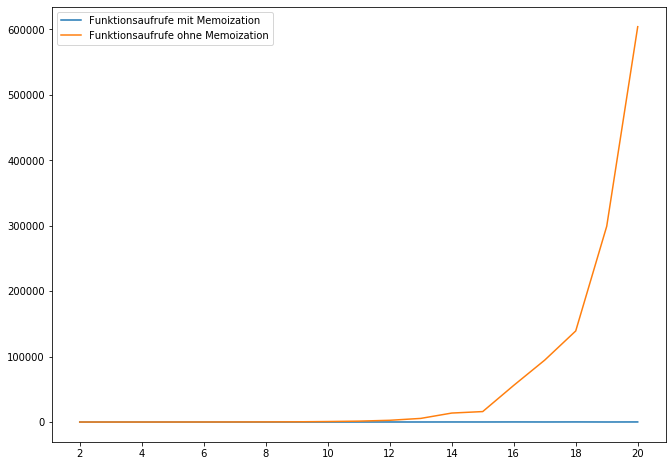

In [14]:
import random as rnd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np


def rand_items(n):
    items = []
    for i in range(0, n):
        items.append((rnd.randint(1, 100), rnd.randint(1, 100)))
    return items


calls_with_memo = []
calls_without_memo = []

for i in range(2, 21):
    calls1 = 0
    calls2 = 0
    
    for j in range(0, 5):
        K = 20 * i
        items = rand_items(i)
        n = len(items) - 1
        global weights
        weights = []
        global values
        values = []
        global calls
        calls = 0
        for item in items:
            weights.append(item[0])
            values.append(item[1])
        value_memo(n, K)
        calls1 += calls
        calls = 0
        value(n, K)
        calls2 += calls
        calls = 0
    calls_with_memo.append(calls1 / 5)
    calls_without_memo.append(calls2 / 5)
    
x = np.arange(2, 21)
y1 = np.asarray(calls_with_memo)
y2 = np.asarray(calls_without_memo)
    
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(x, y1, label='Funktionsaufrufe mit Memoization')
ax1.plot(x, y2, label='Funktionsaufrufe ohne Memoization')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend()
plt.show()

**Beispiel**: Zum Abschluss der Betrachtung des 0/1-Rucksackproblems wenden wir die obigen Überlegungen auf ein einfaches Beispiel an. Gegeben ist die folgende (unsortierte) Gegenstandsliste mit $n=4$ Elementen. Die Kapazität des Rucksacks beträgt $K=5$.
 
 | i  |  1   |   2    |  3   |  4  |
 -|-|-|-|-
 | v  |  100 |  20    |  60  |  40 |
 | w  |  3   |   2    |   4  |  1  |
   
Die im Folgenden aufgestellte Tabelle verwendet die folgenden Ausfüllregeln.

 - $value[0,k]=0$
 - Tabelle zeilenweise ausfüllen, beginnend mit $i=0$.<br>
   Wenn $w[i]>k$,<br>
   dann $value[i,k]=value[i-1,k]$,<br>
   sonst $value[i,k]=max(value[i-1,k], v[i]+value[i-1,k-w[i]])$
   
Die Formeln geben an, dass man die erforderlichen Zwischenwerte in der vorhergehenden Zeile ($i-1$) in der angegebenen Spalte findet.

 i\k |  0  |  1   |   2    |  3   |  4  | 5 
 -|-|-|-|-|-|-
 0 | 0  |  0   |  0    |  0     |  0    | 0
 1 | 0  |  0   |  0    |   100  |  100  | 100
 2 | 0  |  0   |  20   |   100  |  100  | 120
 3 | 0  |  0   |  20   |   100  |  100  | 120
 4 | 0  |  40  |  40   |   100  |  140  | 140

Der Eintrag unten rechts repräsentiert das Ergebnis: $value[n,K]=value[4,5]=140$.


Interessiert man sich für genau die in den Rucksack eingepackten Gegenstände, so ist eine Rückrechnung erforderlich.

    i=n; k=K;
    while i,k>0 do
      if value[i,k] != value[i-1,k]
      then markiere das i-te Element; k=k-w[i];
      i=i-1;
          
Ergebnis: Genau die Gegenstände 1 und 4 werden in den Rucksack gepackt. Deren Gewichtssumme beträgt $4$ ($4<5$) und deren Gesamtwert ist $140$.

**Fazit**: Wie dieses Beispiel illustriert, ist die top-down-Verarbeitung, d.h. Verwendung von Rekursion in Verbindung mit Memoizing, schon deshalb eine ernst zu nehmende Alternative zur klassischen bottom-up-Strategie (mit Schleifen), da man den rekursiven Lösungsansatz schnell findet und dessen fehleranfällige Transformation in ein iteratives Verfahren nicht braucht. Die rekursive Lösung findet sich in den Ausfüllregeln für die Tabelle unmittelbar wieder.

## Bellman-Ford-Algorithmus<a name="BellFordAlg"> </a>

Dynamic Programming kann auch zur Lösung des *'Single-Source Shortest Path Problem'* angewandt werden: Gesucht ist der kürzeste Weg von einer Quelle zu einem anderen Knoten in einem Graphen. Der Bellman-Ford-Algorithmus wurde in den Jahren 1956-1958 von Richard Bellman, Lester Ford und Edward F. Moore veröffentlicht. Dieser Algorithmus und darauf aufbauende Verfahren sind prinzipiell für das Routing in Netzwerken geeignet.

Da es sich um Dynamic Programming handelt, stellt sich die Frage, was die Subprobleme sind. Angenommen man hat einen Pfad von $v$ nach $u$ mit $v=w_0, w_1,..., w_{k-1}, w_k = u$, so ist offensichtlich, dass $w_0, w_1, ..., w_{k-1}$ der kürzeste Pfad zu $w_{k-1}$ ist. Es folgt, dass das Subproblem der kürzeste Weg zu einem der benachbarten Knoten ist, unter Nutzung von einer Kante weniger.

__*Beweis.*__ Nehmen wir an, dass $w_0,...,w_{k-1}$ nicht der kürzeste Weg zwischen $w_0$ und $w_{k-1}$ ist, so gibt es einen Pfad $w_0,w'_1,...,w'_j,w_{k-1}$ mit einer kürzeren Länge. Dadurch hat auch $w_0,w'_1,...,w'_j,w_{k-1},w_k$ eine kürzere Länge als $w_0,...,w_{k-1},w_k$. Dies widerspricht jedoch der Bedingung, dass $w_0,...,w_{k-1},w_k$ der kürzeste Pfad von $w_0$ nach $w_k$ ist.
<div style="text-align: right; font-size: 24px;">&#9633;</div>

### Top down

Mit dieser Erkenntnis lässt sich die folgende rekursive Gleichung aufstellen. $v$ ist der Knoten, zu dem der kürzeste Pfad gefunden werden soll. $v.adj$ sind die Elemente der Adjazenz-Liste von $v$. $s$ ist der Startknoten. $k$ ist die Anzahl der maximal zu benutzenden Kanten und $dis(u,v)$ ist das Kantengewicht von $(u,v)$, d.h. die Entfernung (Distanz) zwischen $u$ und $v$:

$$bf(v,k)=\begin{cases}
    0, & \text{wenn $v=s$}.\\
    \infty, & \text{wenn $v \neq s \text{ und } k=0$}.\\
    \underset{u \in v.adj}{\text{min}}(dis(u, v) + bf(u, k-1)), & \text{sonst}.
  \end{cases}$$
  
Handelt es sich bei $v$ um den Startknoten $s$, so sind die Kosten, um zu $v$ zu gelangen 0. Beträgt die Anzahl der maximal zu benutzenden Kanten 0 und handelt es sich bei $v$ nicht um $s$, so ist $v$ nicht erreichbar und die Funktion gibt $\infty$ zurück. Ansonsten ergibt sich die Lösung aus der kleinsten Summe aus dem Gewicht (Distanz) zu einem der benachbarten Knoten und dem kürzesten Weg dieses benachbarten Knotens unter der Verwendung von $k-1$ Kanten.

Während beim 0/1-Rucksackproblem nicht jeder Gegenstand zwangsläufig in den Rucksack gepackt werden konnte, muss hier in jedem Schritt einer der adjazenten Knoten auch wirklich genommen werden.

__Beispiel:__

<img src="img/bellman_ford_example.png" width="300">
In folgendem Programm werden diese Beispieldaten verwendet.

In [15]:
class Node:
    def __init__(self, id):
        self.id = id
        self.adj = {}

    def add(self, node, weight):
        self.adj[node] = weight


def bellman_ford(v, k):
    if v == source:
        return 0
    if k == 0:
        return float('inf')
    min_dis = float('inf')
    for u, w in v.adj.items():
        dis = w + bellman_ford(u, k-1)
        if dis < min_dis:
            min_dis = dis
    return min_dis

a = Node('a')
b = Node('b')
c = Node('c')
d = Node('d')
e = Node('e')

a.add(b, -1)
a.add(c, 4)
b.add(c, 3)
b.add(d, 2)
b.add(e, 2)
d.add(b, 1)
d.add(c, 5)
e.add(d, -3)


source = d
print(bellman_ford(a, 5))

-2


In [16]:
@memoize
def bellman_ford_memo(v, k):
    if v == source:
        return 0
    if k == 0:
        return float('inf')
    min_dis = float('inf')
    for u, w in v.adj.items():
        dis = w + bellman_ford_memo(u, k-1)
        if dis < min_dis:
            min_dis = dis
    return min_dis

print(bellman_ford_memo(a, 5))

-2


### Bottom Up

<a href="https://studyflix.de/informatik/bellman-ford-algorithmus-1294">Video</a>

Auch für den Bellman-Ford-Algorithmus lässt sich ein Bottom Up-Ansatz angeben. Dabei werden zunächst der Startknoten mit der Distanz 0 und alle anderen Knoten mit der Distanz $\infty$ initialisiert. $\infty$ dient dabei quasi als Platzhalter und steht für "nicht erreichbar". 

Danach werden alle Kanten $(u, v) \in E$ durchiteriert und ein Wert für die Distanz zum Knoten $v$ zugewiesen. Dieser Wert ist entweder die Summe aus der bisher gefundenen Distanz zu $u$ und dem Gewicht (der Distanz) zwischen $u$ und $v$ oder dem bisherigen Wert für die Distanz zu $v$. Dabei wird das Minimum, also der kleinere der beiden Werte, genommen, da der kürzeste Weg gefunden werden soll. 

Dieser Vorgang wird $\lvert V \rvert - 1$ mal wiederholt, da der kürzeste Weg zwischen zwei Knoten maximal über $\lvert V \rvert - 1$ Knoten verläuft, da er sonst mehrfach durch den gleichen Knoten gehen würde und es sich somit um einen Kreis innerhalb des Weges handelt, welcher nicht der kürzeste Weg sein kann. Sollte sich herausstellen, dass für $\lvert V \rvert$ Iterationen sich kürzere Wege ergeben als nach $\lvert V \rvert - 1$ Iterationen, so muss es einen negativen Kreis (negative weight cycle) innerhalb des Graphen geben. Andernfalls wurden die kürzesten Wege ausgehend vom Startknoten gefunden und es existiert kein negativer Kreis im Graphen.

Für die Implementation dieser Variante des Bellman-Ford Algorithmus wird nicht die oben definierte Datenstruktur Node, sondern eine Liste aller Knoten (identifiziert als String) und eine Liste aller Kanten genutzt.

<img src="img/bellman_ford_example.png" width="300">

In [17]:
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight

        
def bellman_ford_bottom_up(nodes, edges, source):
    dis = {}
    #initializing distances
    for node in nodes:
        if node == source:
            dis[node] = (0, source)
        else:
            dis[node] = (float('inf'), None)

    for i in range(len(nodes) - 1):
        for edge in edges:
            if (dis[edge.u][0] + edge.weight < dis[edge.v][0]):
                dis[edge.v] = (dis[edge.u][0] + edge.weight, edge.u)
    
    for edge in edges:
        if (dis[edge.u][0] + edge.weight < dis[edge.v][0]):
            return None #there is a negative weight cycle
    return dis #otherwise return (distance, previous node)-dictionary


nodes = ['a', 'b', 'c', 'd', 'e']
edges = [Edge('b', 'a', -1), Edge('c', 'a', 4), Edge('c', 'b', 3), Edge('d', 'b', 2), Edge('e', 'b', 2), 
         Edge('b', 'd', 1), Edge('c', 'd', 5), Edge('d', 'e', -3)]

print(bellman_ford_bottom_up(nodes, edges, 'd'))

{'a': (-2, 'b'), 'b': (-1, 'e'), 'c': (inf, None), 'd': (0, 'd'), 'e': (-3, 'd')}


Dieser Ausgabe lässt sich entnehmen, dass der kürzeste Weg von d nach a das Gewicht -2 hat: d (-3) e (2) b (-1) a. -3 + 2 -1 = -2.

Durch die zwei Schleifen ist ersichtlich, dass der Bellman-Ford Algorithmus eine Laufzeit von $\mathcal{O}(\lvert V \rvert \cdot \lvert E \rvert)$ hat. Damit ist er ineffizienter als vergleichbare Algorithmen, wie der **Dijkstra Algorithmus**, jedoch hat Bellman-Ford den Vorteil, dass er mit negativen Gewichten der Kanten umgehen kann und das korrekte Ergebnis liefert. 

Sucht man die kürzesten Wege zwischen allen Knotenpaaren eines Graphen, liegt der Zeitaufwand in $\mathcal{O}(|V|^2\cdot |E|)$. Dann ist ggf. der **Floyd-Warshall-Algorithmus** vorzuziehen: Er basiert auch auf Dynamischem Programmieren und hat einen Aufwand in $\mathcal{O}(|V|^3)$.

## Rundreiseproblem

Ein ganz ähnliches Problem wie die Kürzeste-Wege-Fragestellung ist die Frage nach der kürzesten Rundreise, die alle vorgegebenen Städte genau einmal besucht. Es ist unter dem Namen *Traveling Salesman Problem* (TSP) bekannt. Die Planung solcher Touren ist sicher nicht nur für die Auftrittsplanung von Künstlern und für Reiseunternehmen mit logistischem Anspruch von Interesse.

Intuitiv stellt sich die Vermutung ein, dass es sich hierbei um einen Sonderfall des o.g. Problems handelt, für das sich eine Lösung mit den vorgestellten bzw. genannten Algorithmen in $\mathcal{O}(n^3)$ oder sogar $\mathcal{O}(n^2)$ ergibt. $n$ ist die Anzahl der beteiligten Städte. Die Intuition trügt: Bis heute ist kein Verfahren bekannt, dass das Rundreiseproblem mit weniger als exponentiellem Zeitaufwand (exakt) löst. Nur Näherungsverfahren schaffen das.

Leider kann dynamisches Programmieren an dieser Tatsache nichts ändern. Wir prüfen die Anwendbarkeit: In der Tat ist die Optimalitätsbedingung erfüllt. Ein Weg, der o.B.d.A. bei Stadt $i=1$ beginnt (und endet), direkt zu der $e_{i,j}$ entfernten Stadt $j$ führt und danach auf dem Weg zurück zu Stadt $1$ alle Städte aus $\{2,3,4,\ldots,n\}\setminus\{j\}$ genau einmal besucht, ist minimal, wenn eben dieser Weg von $j$ nach $1$ minimal ist.  

Auf dieser Basis können wir ein Top-Down-Lösung wie folgt beschreiben. Natürlich gehen wir davon aus, dass eine Adjazenzmatrix mit den entsprechenden Entfernungen $e$ zwischen je zwei Stäten vorliegt. Mit $S=\{2,3,4,\ldots, n\}$ gilt

$$weg(i,S)=\begin{cases}
    e_{i,1}\ , & \text{wenn $S=\emptyset$}.\\
    \min_{j\in S}(e_{i,j} + weg(j, S\setminus\{j\}), & \text{ sonst}.\\
  \end{cases}$$
  
Der Funktionswert $weg(1,S)$ liefert den kürzesten Rundweg.
  
Für ein iteratives Verfahren einer Bottom-up-Lösung organisiert man eine Tabelle mit $n$ Spalten, nämlich für $2,3,4,\ldots,n,1$, und $2^{n-1}$ Zeilen für alle möglichen Städtemengen, d.h. für die Potenzmenge $\wp(S)$. Das ergebnistragende Feld in der Tabelle ist das in Zeile $\{2,3,4,\ldots,n\}$, Spalte $1$. Wenn man zur Berechnung jedes Tabellenfeldes einen linearen Aufwand veranschlagt, ergibt sich insgesamt $\mathcal{O}(n^22^n)$.

**Beispiel**: Wir betrachten ein asymmetrisches TSP mit folgender Entfernungsmatrix

  e[i,j] |   1   |   2    |  3   |  4  
 -|-|-|-|-
 1 |  $\infty$   |  20    |   15  |  10   
 2 |   8   | $\infty$ |   9  |  8   
 3 |  6   |  12   |   $\infty$  |  13   
 4 |   5  |  10   |   9  |  $\infty$   
 
Die Tabelle für Dynamic Programming (Buttom up) hat folgende Struktur. Zu beachten ist der, dass sich der erste Parameter von `weg(i,S)` aus dem Spaltenindex ergibt.

 $\wp$(S)\i  |   2  |   3    |  4   |  1  
 -|-|-|-|-
 $\emptyset$  | 8    |   6    |  5    | $\infty$
 {2} | $\infty$     |   20    |  18    | 28
 {3} | 15     | $\infty$      |  19    |  
 {4} |      |       |      |  
 {2,3} |  29    |       |      |  
 {2,4} |      |       |      |  
 {3,4} |      |       |      |  
 {2,3,4} |      |       |      |  35


Die Ausfüllregeln der Tabelle folgen der obigen rekursiven Vorschrift, die für das top-down-Verfahren entwickelt wurde.

## Geldwechselproblem

Beim Geldwechselproblem geht es darum, einem Kunden für die Restgeldbetrag-Rückgabe möglichst wenige Münzen heraus zu geben. Es wird also zunächst nach allen möglichen Münzkombinationen, die einen vorgegebenen Betrag ergeben, gefragt. Unter diesen sucht man dann die mit den wenigsten Geldstücken heraus. Dabei ist eine Liste aller verfügbaren (positiven) Münzprägungen (1ct, 2ct, 5ct, 10ct, 50ct, 1€, 2€) gegeben. Es wird angenommen, dass alle Münzwerte beliebig oft zur Verfügung stehen.

Für die Lösung des Geldwechselproblems gibt es auch ein <a href="11 - Greedy Algorithmen.ipynb#geldwechsel">Greedy-Verfahren</a>.

Ein entsprechender Dynamic-Programming-Ansatz<a name="geldwechsel"> </a> ergibt sich folgendermaßen:
Angenommen, man möchte 54ct wechseln und die verfügbaren Münzprägungen sind: 20ct, 10ct, 5ct und 2ct. Wir betrachten nur die erste dieser vier Münzprägungen, nämlich 20ct. Zunächst könnte man sich entscheiden, kein 20ct-Stück zu benutzen und lediglich die in der sortierten Liste der Münzprägungen nachfolgenden Münzstücke verwenden. Man könnte sich auch entscheiden, genau ein 20ct-Stück zu verwenden. In diesem Fall müssen mit den restlichen Münzen nur noch 34ct gewechselt werden. Genauso könnten genau zwei 20ct-Stücke verwendet werden und entsprechend 14ct mit den restlichen Münzen zusammengelegt werden. Die Möglichkeit, drei 20ct-Stücke zu verwenden, steht nicht zur Verfügung, da dies bereits die 54ct überschreiten würde. 

Allgemein gilt: Sei $N$ der zu wechselnde Betrag und $k$ der Wert der zu untersuchenden Münze, so kann die Münze $0$-mal bis $n = \left\lfloor\frac{N}{k}\right\rfloor$-mal verwendet werden. 

__Hinweis.__ 
$f: \mathbb{R} \to \mathbb{Z}$ mit $f(x) = \lfloor x \rfloor$ beschreibt die *floor*-Funktion, bei der die Zahl auf die nächst kleinere ganze Zahl abgerundet wird.

Jetzt müssen für die rekursive Definition noch die Elementarfälle gebildet werden. Beträgt der zu wechselnde Betrag $N = 0$, so gibt es genau eine Möglichkeit, diesen Betrag zu bilden, nämlich indem man keine Münze verwendet. Ist der zu wechselnde Betrag $N$ negativ, so gibt es keine Möglichkeit diesen Betrag zu bilden, da alle Münzen einen positiven Wert haben.

In [18]:
import pandas as pd

dic = {}
coins = [1, 2, 5, 10, 20, 50]


def coin_change(N, i):
    if N == 0:
        return 1
    if N < 0 or i >= len(coins):
        return 0
    if (N, i) in dic:
        return dic[N, i]
    ways = 0
    while N >= 0:
        ways += coin_change(N, i+1)
        N -= coins[i]
    dic[N, i] = ways
    return ways


print(pd.DataFrame({'N': list(range(21)), 'coin change ways': list(map(lambda n: coin_change(n, 0), list(range(21))))})
      .to_string(index=False))

  N  coin change ways
  0                 1
  1                 1
  2                 2
  3                 2
  4                 3
  5                 4
  6                 5
  7                 6
  8                 7
  9                 8
 10                11
 11                12
 12                15
 13                16
 14                19
 15                22
 16                25
 17                28
 18                31
 19                34
 20                41
